# 1. Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
Delivery_time = pd.read_csv('delivery_time.csv')
Delivery_time.columns=['Delivery','Sorting']
Delivery_time

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
Delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
Delivery_time.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
Delivery_time.isnull().sum()

Delivery    0
Sorting     0
dtype: int64

In [6]:
Delivery_time.dropna()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x1e59837ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5983956d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e59837fc70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e598395d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e5983a1130>],
 'means': []}

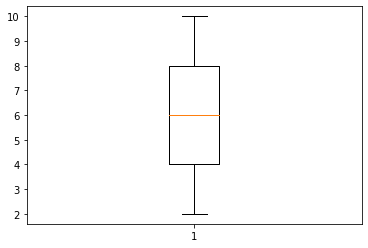

In [7]:
plt.boxplot(Delivery_time['Sorting'])

C:\Users\siyad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

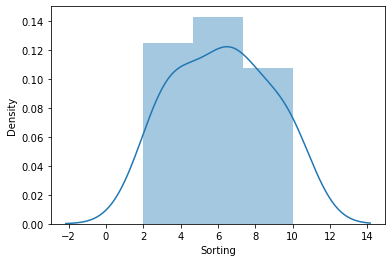

In [8]:
sns.distplot(Delivery_time['Sorting'])

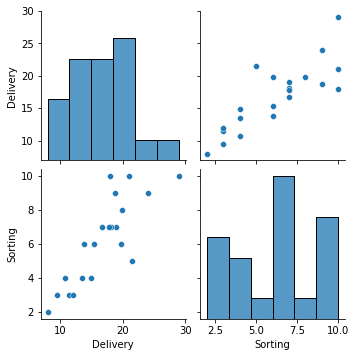

In [9]:
sns.pairplot(Delivery_time)
plt.show()

In [10]:
#correlation
Delivery_time.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

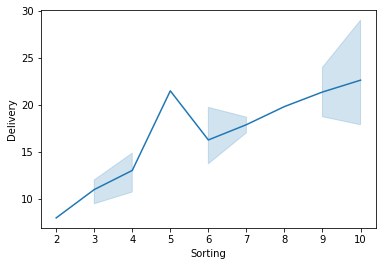

In [11]:
sns.lineplot(x=Delivery_time['Sorting'],y=Delivery_time['Delivery'])

In [12]:
#simple linear regression
model1 = smf.ols("Delivery~Sorting",data = Delivery_time).fit()
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)    


Intercept    6.582734
Sorting      1.649020
dtype: float64 

 Intercept    3.823349
Sorting      6.387447
dtype: float64 

 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [13]:
#r-squared value
model1.rsquared,model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        01:12:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Using log
model2 = smf.ols("np.log(Delivery)~np.log(Sorting)",data = Delivery_time).fit()  #using log
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)

Intercept          1.741987
np.log(Sorting)    0.597522
dtype: float64 

 Intercept          13.085552
np.log(Sorting)     8.024484
dtype: float64 

 Intercept          5.921137e-11
np.log(Sorting)    1.601539e-07
dtype: float64


In [16]:
#r-squared values
model2.rsquared,model2.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                        01:12:27   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#using square
model3 = smf.ols("Delivery~np.square(Sorting)",data = Delivery_time).fit()
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)

Intercept             11.237205
np.square(Sorting)     0.124870
dtype: float64 

 Intercept             9.398601
np.square(Sorting)    5.691330
dtype: float64 

 Intercept             1.415704e-08
np.square(Sorting)    1.739194e-05
dtype: float64


In [19]:
#r-squared values
(model3.rsquared,model3.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [20]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.74e-05
Time:                        01:12:27   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sorting)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#using square-root
model4 = smf.ols("Delivery~np.sqrt(Sorting)",data = Delivery_time).fit()
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)

Intercept          -2.518837
np.sqrt(Sorting)    7.936591
dtype: float64 

 Intercept          -0.840911
np.sqrt(Sorting)    6.592434
dtype: float64 

 Intercept           0.410857
np.sqrt(Sorting)    0.000003
dtype: float64


In [22]:
#r-squared values
model4.rsquared,model4.rsquared_adj

(0.6958062276308671, 0.6797960290851233)

In [23]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.61e-06
Time:                        01:12:27   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Salary_hike -> Build a prediction model for Salary_hike


In [24]:
Salary_hike = pd.read_csv('Salary_Data.csv')
Salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [25]:
Salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [26]:
Salary_hike.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [27]:
Salary_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [28]:
Salary_hike.shape

(30, 2)

C:\Users\siyad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

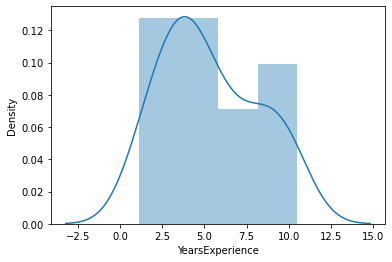

In [29]:
sns.distplot(Salary_hike['YearsExperience'])

C:\Users\siyad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

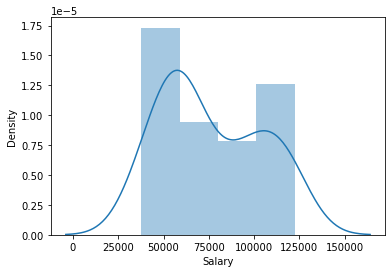

In [30]:
sns.distplot(Salary_hike['Salary'])

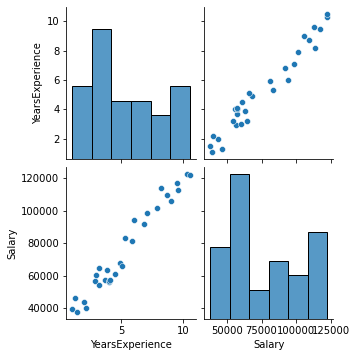

In [31]:
sns.pairplot(Salary_hike)
plt.show()

In [32]:
#Correlation
Salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

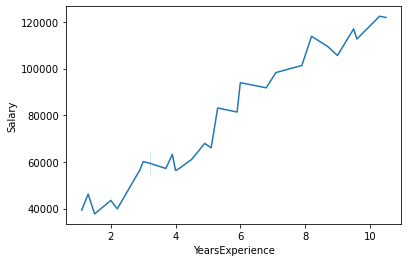

In [33]:
sns.lineplot(x=Salary_hike['YearsExperience'],y=Salary_hike['Salary'])

In [34]:
#Simple linear regression
model1 = smf.ols("Salary~YearsExperience",data = Salary_hike).fit()
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues) 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64 

 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [35]:
#r-squared values
model1.rsquared,model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        01:12:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Log transformation
model2 = smf.ols("Salary~np.log(YearsExperience)",data = Salary_hike).fit()
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues) 

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [38]:
#r-squared values
model2.rsquared,model2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        01:12:29   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Square transformation
model3 = smf.ols("Salary~np.square(YearsExperience)",data = Salary_hike).fit()
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)

Intercept                     48042.585515
np.square(YearsExperience)      776.318773
dtype: float64 

 Intercept                     21.973654
np.square(YearsExperience)    17.397015
dtype: float64 

 Intercept                     3.389190e-19
np.square(YearsExperience)    1.518127e-16
dtype: float64


In [41]:
#r-squared values
model3.rsquared,model3.rsquared_adj

(0.9153198857852565, 0.9122955959918728)

In [42]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.52e-16
Time:                        01:12:29   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Square root transformation
model4 = smf.ols("Salary~np.sqrt(YearsExperience)",data = Salary_hike).fit()
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64 

 Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 

 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [44]:
#r-squared values
model4.rsquared,model4.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

In [45]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           8.57e-18
Time:                        01:12:29   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""